**Section I: Import the Data**

Imports and Read in File

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

In [2]:
adult = pd.read_csv("../../assets/datasets/adult.csv")

**Section II: Format the Data**

Convert the data to a Pandas dataframe to work with the data:

In [4]:
adult.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small


In [11]:
adult.income.unique()

array(['small', 'large', nan], dtype=object)

Convert the categorical Data to numeric for our analysis. **HINT:** Refer to lesson 1.1 for writing a function of this sort

In [12]:
def convert_race(val):
    if val == 'White':
        return 1
    elif val == 'Black':
        return 2
    elif val == 'Asian-Pac-Islander':
        return 3
    elif val == 'Amer-Indian-Eskimo':
        return 4
    else:
        return 5

def convert_sex(val):
    if val=='Male':
        return 1
    else:
        return 2
    
def convert_income(val):
    if val=='small':
        return 1
    else:
        return 2 

Apply the functions you just wrote and append the results to the dataframe

In [15]:
adult.race = adult.race.apply(convert_race)
adult.sex = adult.sex.apply(convert_sex)
adult.income = adult.income.apply(convert_income)

In [18]:
adult.drop(labels=['workclass','education','marital-status','occupation','relationship','native-country'],axis=1,inplace=True)

In [19]:
adult.head(2)

,age,fnlwgt,education-num,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,5,1,2174,0,40,1
1,50,83311,13,5,1,0,0,13,1


**Section III: Examine the Data**

Plot the Data to see the distributions our our target markets; plot multiple indicators to see the relationships *IE: Education and Income*

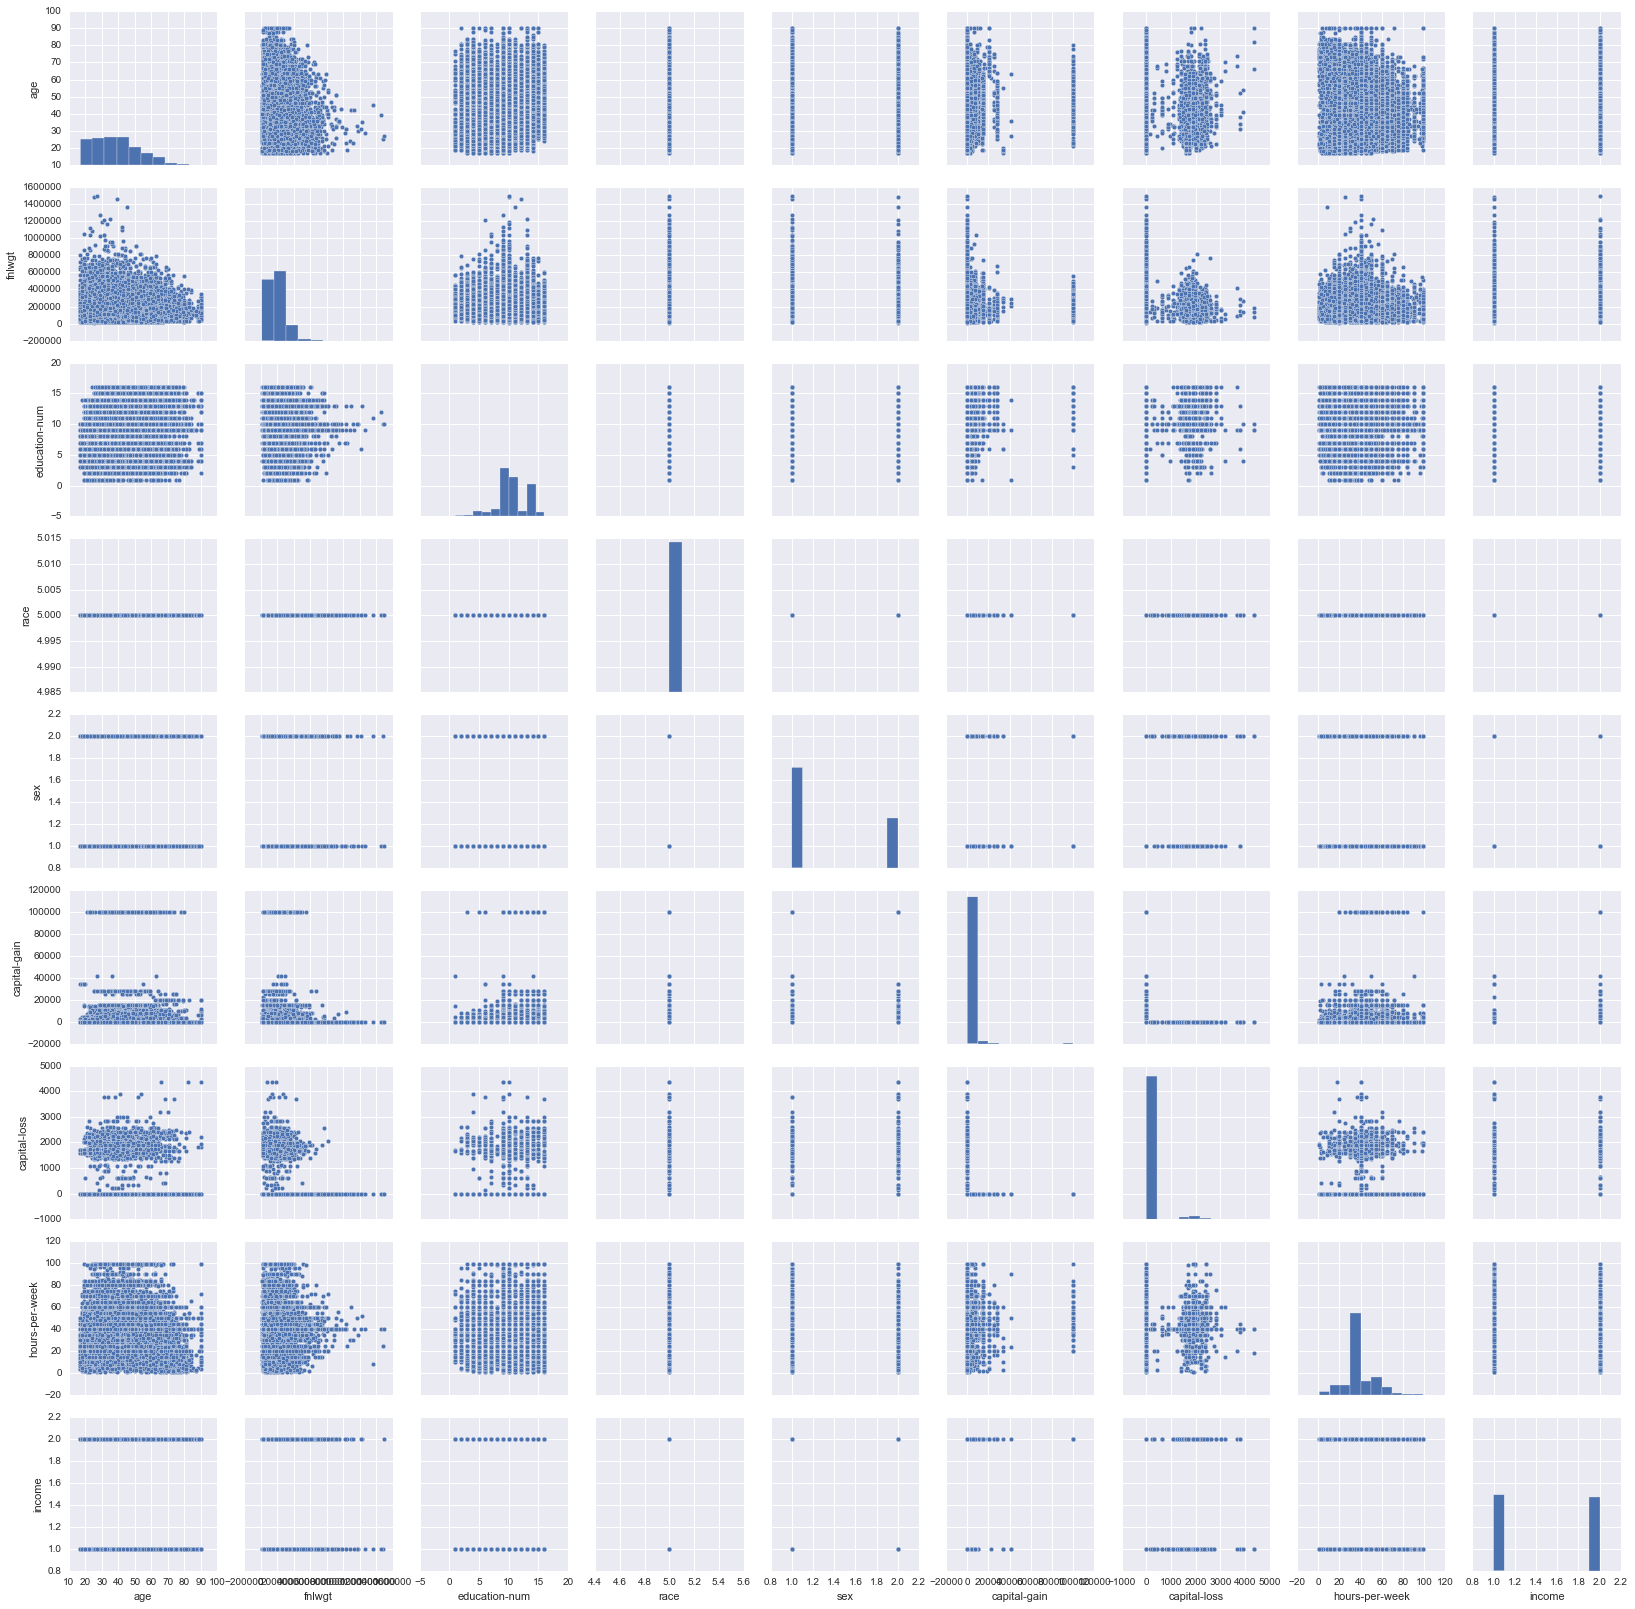

In [20]:
import seaborn as sns
sns.pairplot(adult)
plt.show()

**Section IV: Prepare for Clustering**

Create a New Dataframe with just numerical data for the analysis

Check for NaN and Infinite Numbers - Our data is messy!

In [24]:
np.any(np.isnan(adult))

False

Convert to the Pandas Array to a Numpy Matrix - Your function will only take numerical inputs

**Section V: Clustering Analysis**

Cluster the Data to our our target groups. **BONUS**: Perform multiple clustering tests on various indicator variables

In [27]:
from sklearn.cluster import KMeans
n_clusters=2
kmeans = KMeans(n_clusters,random_state=1)
kmeans.fit(adult)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

Get the labels and centroids

In [28]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Compute the Silhoutte Score to measure your analysis

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(adult,labels,metric='euclidean')